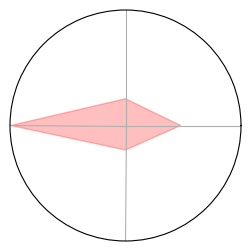

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Data
#labels = ['Value 1', 'Value 2', 'Value 3', 'Value 4']
'''
COVID-QA,TechQA,DuoRC,CUAD
'''
values = [2.1055, 0.5085965614, 5.457154245, 0.3795081967]

# Number of variables
num_vars = len(values)

# Compute angle for each axis
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

# The plot is circular, so we need to "complete the loop" and append the start of the angles to the end
values += values[:1]
angles += angles[:1]

# Plot
fig, ax = plt.subplots(figsize=(3, 3), subplot_kw=dict(polar=True))
ax.fill(angles, values, color='red', alpha=0.25)  # Fill the area


# Remove labels
ax.set_yticklabels([])
ax.set_xticklabels([])  # Remove x-axis tick labels
ax.yaxis.grid(False)


# Reduce the length of the radial axes
ax.set_ylim(-1, 5.5)  # Adjust the limit according to your preference
ax.set_thetagrids([90, 180, 270, 360])
# Show plot
plt.show()
#fig.savefig('temp.png', transparent=True, dpi=300)


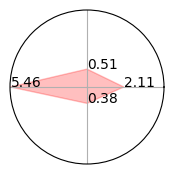

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Data
labels = ['COVID-QA', 'TechQA', 'DuoRC', 'CUAD']
values = [2.1055, 0.5085965614, 5.457154245, 0.3795081967]

# Number of variables
num_vars = len(values)

# Compute angle for each axis
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

# The plot is circular, so we need to "complete the loop" and append the start of the angles to the end
values += values[:1]
angles += angles[:1]

# Plot
fig, ax = plt.subplots(figsize=(2, 2), subplot_kw=dict(polar=True))
ax.fill(angles, values, color='red', alpha=0.25)  # Fill the area

# Annotate data points with values
for i, (angle, value) in enumerate(zip(angles[:-1], values[:-1])):
    ax.text(angle, value, f'{value:.2f}', horizontalalignment = 'left')

# Remove labels
ax.set_yticklabels([])
ax.set_xticklabels([])  # Remove x-axis tick labels
ax.yaxis.grid(False)

# Reduce the length of the radial axes
ax.set_ylim(-1, 5.5)  # Adjust the limit according to your preference
ax.set_thetagrids([90, 180, 270, 360])

# Show plot
plt.show()
fig.savefig('temp.png', transparent=True, dpi=300)

In [ ]:
import io
import pandas as pd

def return_em_f1_arrays(all_scores):
  scores_raw = pd.read_csv(io.StringIO(all_scores), header=None)

  cols = '''A=2|H=128,A=4|H=256,A=8|H=512,A=12|H=768,A=16|H=1024'''.split(',')
  layers = '''
  L=2
  L=4
  L=6
  L=8
  L=10
  L=12
  L=24
  '''.split()
  scores_raw.rename(columns=dict(zip(scores_raw.columns.to_list(), cols)), inplace=True)
  scores_raw.rename(index=dict(zip(scores_raw.index.to_list(), layers)), inplace=True)

  scores_raw.fillna(-1, inplace=True)

  EM = []
  F1 = []
  for row in scores_raw.itertuples(index=False):
    current_EM = []
    current_F1 = []
    for val in row:
      try:
        current_EM.append(float(val.split('|')[0].strip()))
        current_F1.append(float(val.split('|')[1].strip()))
      except:
        current_EM.append(-1)
        current_F1.append(-1)
    EM.append(current_EM)
    F1.append(current_F1)

  return np.array(EM), np.array(F1)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def create_plot(squad_array, covidqa_array, duorc_array, techqa_array, cuad_array, metric):
  # Define the data
  datasets = ['SQuAD', 'COVID-QA', 'DuoRC', 'TechQA', 'CUAD']
  models = ['L=2', 'L=4', 'L=6', 'L=8', 'L=10', 'L=12', 'L=24']
  configurations = ['A=2|H=128', 'A=4|H=256', 'A=8|H=512', 'A=12|H=768', 'A=16|H=1024']

  # Extract performance scores for each dataset
  data = {'SQuAD': squad_array,
      'COVID-QA': covidqa_array,
      'DuoRC': duorc_array,
      'TechQA': techqa_array,
      'CUAD': cuad_array}

  # Create a heatmap for each dataset
  fig, axs = plt.subplots(1, len(datasets), figsize=(18, 3.9))

  for i, dataset in enumerate(datasets):
      ax = axs[i]
      ax.set_title(dataset)
      ax.set_xticks(np.arange(len(configurations)))
      ax.set_xticklabels(configurations, rotation=45)
      ax.set_yticks(np.arange(len(models)))
      ax.set_yticklabels(models)
      im = ax.imshow(data[dataset], cmap='magma', vmin=np.nanmin(data[dataset]), vmax=np.nanmax(data[dataset]))

      # Create colorbar
      cbar = ax.figure.colorbar(im, ax=ax)
      cbar.ax.set_ylabel(metric, rotation=-90, va="bottom")

  plt.tight_layout()
  plt.show()

In [ ]:
squad_em, squad_f1 = return_em_f1_arrays('''
29.58 | 41.44,39.54 | 51.29,53.42 | 64.99,56.97 | 66.17,
38.59 | 49.19,58.18 | 69.12,69.99 | 79.60,73.92 | 82.59,
44.00 | 55.78,63.81 | 74.25,75.22 | 83.55,78.25 | 86.19,
44.88 | 55.38,67.74 | 77.48,77.39 | 85.22,80.68 | 88.38,
51.58 | 62.44,71.41 | 80.44,78.13 | 86.08,81.33 | 88.66,
55.88 | 66.72,71.67 | 80.62,79.74 | 87.41,80.9 | 88.2,
,,,,83.49 | 90.6
''')

covidqa_em, covidqa_f1 = return_em_f1_arrays('''
4.41 | 8.85 | 13.62,6.24 | 11.79 | 15.49,10.4 | 19.78 | 19.63,11.69 | 21.35 | 20.09,
5.00 | 9.54 | 12.91,10.6 | 19.65 | 16.28,17.09 | 31.21 | 23.69,17.43 | 32.67 | 25.41,
7.88 | 15.36 | 14.59,13.77 | 25.7 | 20.62,18.13 | 34.14 | 25.86,18.57 | 33.40 | 26.54,
6.98 | 13.51 | 13.57,15.9 | 29.96 | 24.69,18.92 | 34.16 | 26.3,21.3 | 38.02 | 28.95,
9.61 | 18.26 | 16.2,16.34 | 30.05 | 23.3,18.92 | 34.09 | 27.61,19.47 | 35.45 | 28.0,
11.54 | 21.1 | 17.04,17.38 | 31.42 | 24.73,19.46 | 34.96 | 27.4,22.39 | 42.11 | 28.81,
,,,,22.14 | 38.52 | 27.69
''')

duorc_em, duorc_f1 = return_em_f1_arrays('''
23.29 | 30.96 | 14.56,28.66 | 37.37 | 15.33,38.59 | 49.47 | 14.54,38.69 | 49.11 | 13.89,
29.48 | 37.52 | 13.29,40.19 | 51.0 | 13.26,47.1 | 59.34 | 14.29,47.69 | 59.56 | 14.08,
30.17 | 39.7 | 15.04,44.3 | 55.8 | 13.8,48.29 | 60.56 | 14.19,50.14 | 62.95 | 15.02,
31.92 | 40.73 | 13.87,44.89 | 56.83 | 14.41,49.79 | 62.06 | 14.53,49.89 | 62.68 | 14.93,
35.73 | 45.02 | 13.58,47.07 | 58.87 | 13.79,50.7 | 63.16 | 14.72,52.35 | 65.26 | 14.67,
39.9 | 49.87 | 13.81,48.96 | 60.86 | 14.18,50.88 | 63.35 | 14.78,54.95 | 68.46 | 14.72,
,,,,55.54 | 68.38 | 14.54
''')

techqa_em, techqa_f1 = return_em_f1_arrays('''
1.61 | 4.32 | 16.14,1.61 | 4.35 | 15.52,1.61 | 4.39 | 14.87,1.61 | 4.68 | 17.09,
1.61 | 4.72 | 13.54,1.61 | 4.13 | 17,1.93 | 5.27 | 17.21,1.61 | 6.06 | 23,
1.61 | 4.08 | 13.8,1.61 | 4.3 | 15.6,1.61 | 5.74 | 23.44,1.61 | 6.5 | 23.21,
1.61 | 3.56 | 12.82,1.61 | 4.56 | 22.71,1.61 | 5.91 | 26,1.61 | 6.69 | 26.39,
1.61 | 3.44 | 13.38,1.61 | 5.1 | 21.61,1.94 | 5.87 | 21.62,1.61 | 6.5 | 26.37,
1.61 | 3.9 | 16,1.94 | 6.03 | 22.94,1.61 | 6.86 | 29.19,1.61 | 6.36 | 26.89,
,,,,1.61 | 6.55 | 30.79
''')

cuad_em, cuad_f1 = return_em_f1_arrays('''
1.1 | 1.98 | 14.14,0.98 | 1.99 | 14.09,1.62 | 3.16 | 19.73,1.03 | 2.5 | 20.47,
0.78 | 1.87 | 15.22,1.53 | 2.63 | 19.34,1.32 | 2.45 | 18.5,1.15 | 2.83 | 33.18,
0.93 | 1.88 | 15.73,1.23 | 2.74 | 18.03,0.74 | 1.95 | 24.94,1.94 | 4.24 | 30.41,
1.03 | 2.04 | 14.47,0.6 | 2.04 | 26.97,0.38 | 1.86 | 33.01,2.15 | 4.6 | 36.31,
1.15 | 2.4 | 16.99,1.15 | 2.33 | 21.86,0.88 | 2.55 | 30.51,1.31 | 3.45 | 36.87,
0.55 | 1.86 | 20.71,0.55 | 1.99 | 27.08,1.72 | 3.95 | 36.35,2.46 | 4.63 | 33.55,
,,,,0.78 | 3.56 | 43.75
''')

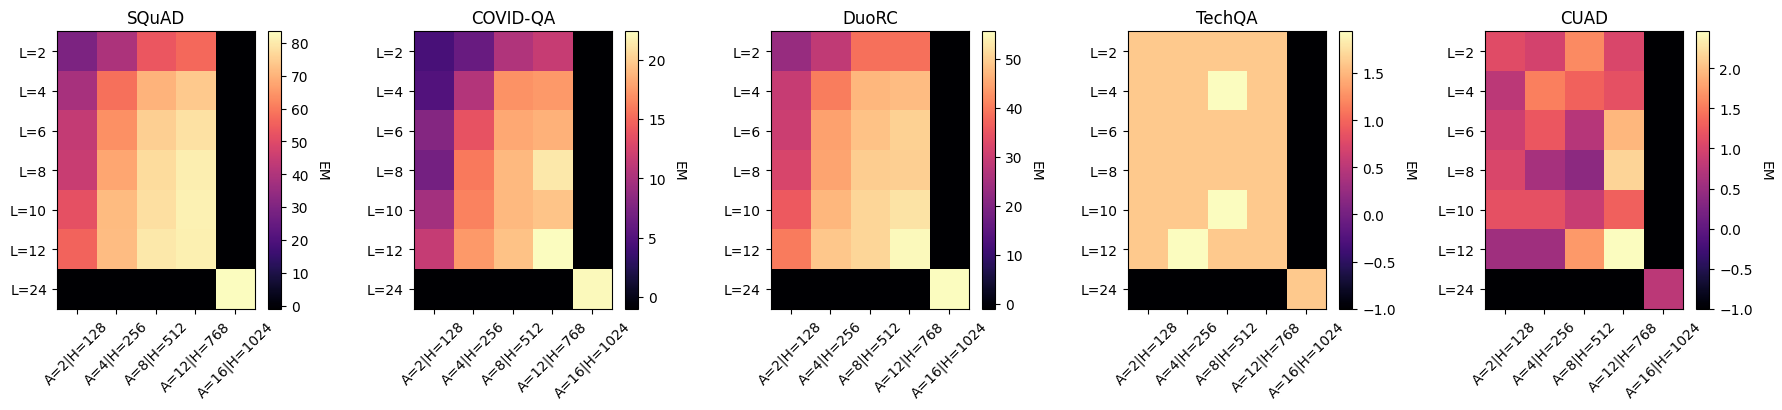

In [ ]:
create_plot(squad_em, covidqa_em, duorc_em, techqa_em, cuad_em, metric='EM')

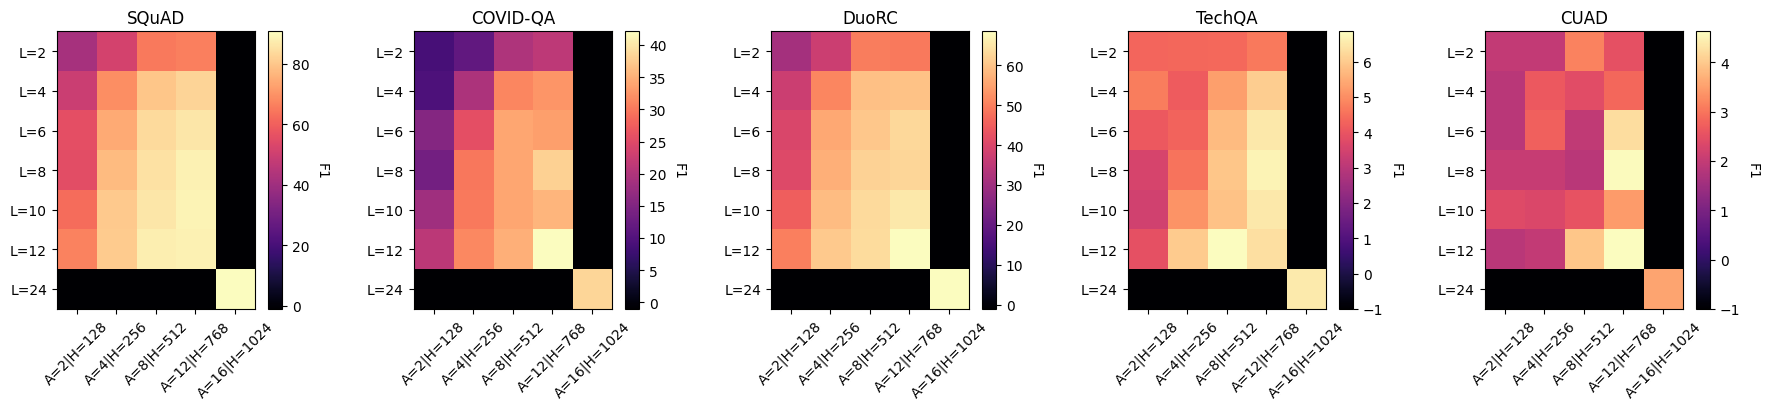

In [ ]:
create_plot(squad_f1, covidqa_f1, duorc_f1, techqa_f1, cuad_f1, metric='F1')